# Parsers de dependencias

## Requerimientos
- Python 3
- Spacy
- NLTK
- MaltParser
- Stanza

In [39]:
import spacy
import nltk
import re
from nltk import Tree
from spacy import displacy 
from nltk.parse import malt

No poseen distinción entre símbolos no terminales y terminales. Las estructuras representan relaciones de dependencia entre terminales.
Ejemplos de parsers de dependencias:
* [Projective Dependency Parser de NLTK](https://www.nltk.org/_modules/nltk/parse/projectivedependencyparser.html)
* [Maltparser](http://www.maltparser.org/)
* SyntaxNet (Estaba alojado en https://opensource.google.com/projects/syntaxnet, como parte de los recursos de la librería para Inteligencia Artificial TensorFlow de Google, pero en este momento no está disponible y [se rumorea](https://github.com/tensorflow/models/issues/8411) que se lo va a mover al github de [google-research](https://github.com/google-research/google-research))
* [Dependency parser de Spacy](https://spacy.io/usage/linguistic-features#dependency-parse)

## Projective Dependency Parser NLTK

In [7]:
def dep_parser(sentence, grammar):         # define una función llamada dep_parser con dos argumentos
    sentence = sentence.lower()            # convierte a minúscula la oración
    if sentence.endswith('.'):             # si la oración termina con un punto
        sent = re.sub('\.','',sentence)    # se lo quita
    else:                                  # si no
        sent = sentence                    # la toma como está
    sent = sent.split()                    # divide la oración en palabras
    dep_gram = nltk.data.load(grammar, cache=False) # carga la gramática a nltk
    dep_gram = nltk.DependencyGrammar.fromstring(dep_gram) # parsea la gramática como gramática de dependencias
    pdp = nltk.ProjectiveDependencyParser(dep_gram) # aarga la gramática en el parser
    print(dep_gram)                        # imprime mi gramática
    for tree in pdp.parse(sent):           # para cada árbol posible en mi gramática para esa oración
        print(tree)                        # lo imprime
        return(tree)

In [18]:
#Para correr el Proyective Dependency Parser

oracion1 = 'Pablo explotó el globo'    # Define la oración a analizar
#grammar = 'gramaticas/DG1.txt'        # establece cuál va a ser mi gramática
# !COMENTARIO
# acá puse la otra gramática que sugiero
grammar = 'gramaticas/DG1_suggest.txt' # establece cuál va a ser mi gramática
dep_parser(oracion1, grammar)          # Para correr la función

Dependency grammar with 36 productions
  'fuma' -> 'fede'
  'fuma' -> 'cata'
  'fuma' -> 'julia'
  'fuma' -> 'martín'
  'fuma' -> 'vicky'
  'fuma' -> 'pablo'
  'fuma' -> 'juan'
  'explotó' -> 'fede'
  'explotó' -> 'cata'
  'explotó' -> 'julia'
  'explotó' -> 'martín'
  'explotó' -> 'vicky'
  'explotó' -> 'pablo'
  'explotó' -> 'globo'
  'explotó' -> 'facultad'
  'globo' -> 'el'
  'tabaco' -> 'el'
  'cigarrillo' -> 'el'
  'plaza' -> 'la'
  'facultad' -> 'la'
  'fue' -> 'el'
  'fue' -> 'entregado'
  'fue' -> 'enviado'
  'fue' -> 'fumado'
  'fue' -> 'explotado'
  'entregado' -> 'por'
  'explotado' -> 'por'
  'fumado' -> 'por'
  'enviado' -> 'por'
  'por' -> 'fede'
  'por' -> 'cata'
  'por' -> 'julia'
  'por' -> 'martín'
  'por' -> 'vicky'
  'por' -> 'pablo'
  'por' -> 'facultad'


## Non-Projective Dependency Parser NLTK

In [19]:
def npdep_parser(sentence, grammar):                # define una función llamada dep_parser con dos argumentos
    sentence = sentence.lower()                     # convierte a minúscula la oración
    if sentence.endswith('.'):                      # si la oración termina con un punto
        sent = re.sub('\.',' ',sentence)            # se lo quita
    else:                                           # si no
        sent = sentence                             # la toma como está
    sent = sent.split()                             # divide la oración en palabras
    dep_gram = nltk.data.load(grammar, cache=False) # carga la gramática a nltk
    dep_gram = nltk.DependencyGrammar.fromstring(dep_gram) # parsea la gramática como gramática de dependencias
    pdp = nltk.NonprojectiveDependencyParser(dep_gram) # carga la gramática en el parser
    print(sent)
    print(dep_gram)                                  # imprime mi gramática
    g, = pdp.parse(sent)
    print(g.root['word'])
    structure = g.tree()
    print(structure)
    return(structure)

['fede', 'fuma', 'el', 'cigarrillo']
Dependency grammar with 37 productions
  'fuma' -> 'fede'
  'fuma' -> 'cata'
  'fuma' -> 'julia'
  'fuma' -> 'martín'
  'fuma' -> 'vicky'
  'fuma' -> 'pablo'
  'fuma' -> 'juan'
  'fuma' -> 'cigarrillo'
  'explotó' -> 'fede'
  'explotó' -> 'cata'
  'explotó' -> 'julia'
  'explotó' -> 'martín'
  'explotó' -> 'vicky'
  'explotó' -> 'pablo'
  'explotó' -> 'globo'
  'explotó' -> 'facultad'
  'globo' -> 'el'
  'tabaco' -> 'el'
  'cigarrillo' -> 'el'
  'plaza' -> 'la'
  'facultad' -> 'la'
  'fue' -> 'el'
  'fue' -> 'entregado'
  'fue' -> 'enviado'
  'fue' -> 'fumado'
  'fue' -> 'explotado'
  'entregado' -> 'por'
  'explotado' -> 'por'
  'fumado' -> 'por'
  'enviado' -> 'por'
  'por' -> 'fede'
  'por' -> 'cata'
  'por' -> 'julia'
  'por' -> 'martín'
  'por' -> 'vicky'
  'por' -> 'pablo'
  'por' -> 'facultad'
fuma
(fuma fede (cigarrillo el))


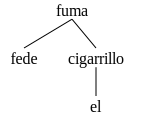

In [23]:
#Para correr el Nonproyective Dependency Parser

oracion1 = 'fede fuma el cigarrillo'    # Define la oración a analizar
#grammar1 = 'gramaticas/DG1.txt'        # establece cuál va a ser mi gramática
# !COMENTARIO
# acá puse la otra gramática que sugiero
grammar1 = 'gramaticas/DG1_suggest.txt' # establece cuál va a ser mi gramática
npdep_parser(oracion1, grammar1)        # Para correr la función

['quién', 'fuma', 'el', 'cigarrillo']
Dependency grammar with 55 productions
  'dijo' -> 'juan'
  'dijo' -> 'fede'
  'dijo' -> 'cata'
  'dijo' -> 'julia'
  'dijo' -> 'martín'
  'dijo' -> 'vicky'
  'dijo' -> 'pablo'
  'dijo' -> 'andrés'
  'dijo' -> 'mati'
  'dijo' -> 'quién' 'el'
  'dijo' -> 'la'
  'dijo' -> 'un'
  'dijo' -> 'una'
  'dijo' -> 'que'
  'dijo' -> 'qué'
  'dijiste' -> 'vos' 'el'
  'dijiste' -> 'la'
  'dijiste' -> 'un'
  'dijiste' -> 'una'
  'dijiste' -> 'que'
  'dijiste' -> 'qué'
  'fuma' -> 'juan'
  'fuma' -> 'fede'
  'fuma' -> 'cata'
  'fuma' -> 'julia'
  'fuma' -> 'martín'
  'fuma' -> 'vicky'
  'fuma' -> 'pablo'
  'fuma' -> 'andrés'
  'fuma' -> 'mati'
  'fuma' -> 'quién'
  'fuma' -> 'fede'
  'fuma' -> 'cata'
  'fuma' -> 'julia'
  'fuma' -> 'martín'
  'fuma' -> 'vicky'
  'fuma' -> 'pablo'
  'fuma' -> 'andrés'
  'fuma' -> 'mati'
  'fuma' -> 'quién' 'el'
  'fuma' -> 'la'
  'fuma' -> 'un'
  'fuma' -> 'una'
  'fuma' -> 'qué'
  'el' -> 'cigarrillo'
  'el' -> 'tabaco'
  'la' ->

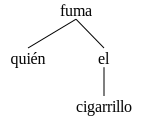

In [24]:
#Para correr el Nonproyective Dependency Parser

oracion2 = 'quién fuma el cigarrillo'  # Define la oración a analizar
#oracion2 = 'quién dijo fede que fuma'  # Define la oración a analizar
#oracion2 = 'qué dijo fede que fuma'  # Define la oración a analizar
# Habría que arreglar la función npdep_parser para que pueda tomar estas dos últimas oraciones
grammar2 = 'gramaticas/DG2.txt'       # establece cuál va a ser mi gramática
npdep_parser(oracion2, grammar2)        # Para correr la función

## Spacy - Dependency parser

### Nota para quien no tenga la MV: 

Antes de correr hay que instalar spacy. Con pip3, eso se puede hacer con el comando 

`pip3 install spacy`

Hay que instalar también es_core_news_sm, un modelo entrenado mediante un corpus del español, con el comando

`python3 -m spacy download es_core_news_sm`

Alternativamente puede probarse de instalar es_core_news_md.

`python3 -m spacy download es_core_news_md`

En ese caso, para correrlo hay que cambiar en el código de abajo `es_core_news_sm` por `es_core_news_md`

In [74]:
def gramaticadependencias(sentence):       #Define la función
    nlp = spacy.load('es_core_news_sm')    #Carga el modelo entrenado
    doc = nlp(sentence)                    #define una variable doc con la oración procesada por el modelo
    #for token in doc:               
        #print(token.text, token.dep_, token.head.text, token.head.pos_,
        #    [child for child in token.children])
    # !COMENTARIO
    # esto no aporta mucho, pero podemos mostrar que se puede customizar la visualización
    # options = {"compact": True, "bg": "#09a3d5","color": "white", "font": "Source Sans Pro"}
    #displacy.render(doc, style='dep', jupyter=True, options=options)
    displacy.render(doc, style='dep', jupyter=True)

In [ ]:
# !COMENTARIO
# ju, comento la celda que sigue porque, claro, no se renderiza nada porque tampoco se le mete ningín input
# por ahí lo podemos dejar comentado y lo descomentamos en la clase

In [134]:
#oracion5 = input('Escribí una oración\n')
#gramaticadependencias(oracion5)

In [131]:
# !COMENTARIO
# creo que también se puede mostrar esto, ¿qué te parece?
# si te parece mejor, lo paso a una función
# lo puse así no más a ver si te gustaba, si no, lo sacamos

nlp = spacy.load('es_core_news_sm')
doc = nlp(oracion5)
root = [token for token in doc if token.head == token][0]
print('| {0:10}| {1:5}| {2:7}| {3:7}| {4:30} |'.format('TEXTO','DEP','N_IZQ','N_DER','ANCESTROS'))
print('|'+'='*69+'|')
for descendant in root.subtree:
    assert root is descendant or root.is_ancestor(descendant)
    print('| {0:10}| {1:5}| {2:7}| {3:7}| {4:30} |'.format(
        descendant.text,
        descendant.dep_,
        descendant.n_lefts,
        descendant.n_rights,
        str([ancestor.text for ancestor in descendant.ancestors])
    )
)

| TEXTO     | DEP  | N_IZQ  | N_DER  | ANCESTROS                      |
|=====================================================================|
| en        | case |       0|       0| ['casa', 'tomamos']            |
| mi        | det  |       0|       0| ['casa', 'tomamos']            |
| casa      | obl  |       2|       0| ['tomamos']                    |
| tomamos   | ROOT |       1|       2| []                             |
| café      | obj  |       0|       1| ['tomamos']                    |
| con       | case |       0|       0| ['masitas', 'café', 'tomamos'] |
| masitas   | obl  |       1|       0| ['café', 'tomamos']            |
| por       | case |       0|       0| ['tarde', 'tomamos']           |
| la        | det  |       0|       0| ['tarde', 'tomamos']           |
| tarde     | obl  |       2|       0| ['tomamos']                    |


## Malt Parser

### Instrucciones

Crear la carpeta malt y adentro bajar los siguientes archivos:
- Malt Parser de [http://www.maltparser.org/download.html](http://www.maltparser.org/download.html)
- Bajar el modelo entrenado engmalt.poly-1.7 de [http://www.maltparser.org/mco/english_parser/engmalt.html](http://www.maltparser.org/mco/english_parser/engmalt.html)


In [66]:
# !COMENTARIO
# Ju, te dejo una sugerencia para la descarga de lo anterior, para que puedan hacerlo
# ejecutando una celda no más y haya menos margen de error y preguntas
# si te parece ok, dejala y, si no, la borramos
# los comentarios son para vos, después, borralos si te parece

# descarga maltparser desde la url indicada en una carpeta llamada maltparser-1.9.2 (la crea)
! wget -qO- http://maltparser.org/dist/maltparser-1.9.2.tar.gz | tar -xvz > /dev/null

# descarga el modelo engmalt.poly-1.7 en la carpeta maltparser-1.9.2
! wget -P maltparser-1.9.2 http://www.maltparser.org/mco/english_parser/engmalt.poly-1.7.mco

--2022-06-12 17:00:42--  http://www.maltparser.org/mco/english_parser/engmalt.poly-1.7.mco
Resolving www.maltparser.org (www.maltparser.org)... 195.74.38.120
Connecting to www.maltparser.org (www.maltparser.org)|195.74.38.120|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.maltparser.org/mco/english_parser/engmalt.poly-1.7.mco [following]
--2022-06-12 17:00:43--  https://www.maltparser.org/mco/english_parser/engmalt.poly-1.7.mco
Connecting to www.maltparser.org (www.maltparser.org)|195.74.38.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21556252 (21M) [application/x-troff-man]
Saving to: ‘maltparser-1.9.2/engmalt.poly-1.7.mco.2’

engmalt.poly-1.7.mc 100%[===================>]  20,56M  1,28MB/s    in 19s     

2022-06-12 17:01:03 (1,06 MB/s) - ‘maltparser-1.9.2/engmalt.poly-1.7.mco.2’ saved [21556252/21556252]



In [69]:
import os

# !COMENTARIO
# indica el path absoluto a donde se encuentra esta notebook
# (por si alguien no está usando la virtual)
# lo que también está bueno de os.pah.join es que, si alguien está usando windows, 
# donde las barras van al revés, os las pone bien y no van a tener que cambiarlas
# no entiendo bien por qué hay que 
here = os.path.abspath('.')
maltparser_folder = 'maltparser-1.9.2'
os.environ['MALT_PARSER'] = os.path.join(here, maltparser_folder, '')
os.environ['MALT_MODEL'] = os.path.join(here, maltparser_folder, 'engmalt.poly-1.7.mco')

In [70]:
maltParser = nltk.parse.malt.MaltParser(os.getenv('MALT_PARSER'), os.getenv('MALT_MODEL'))

In [67]:
import os
os.environ['MALT_PARSER']="/home/grmf/Escritorio/seminario-gramaticas-formales/Clase-11/malt/maltparser-1.9.2/"
os.environ['MALT_MODEL']="/home/grmf/Escritorio/seminario-gramaticas-formales/Clase-11/malt/maltparser-1.9.2/engmalt.poly-1.7.mco"

In [ ]:
parserversion = '/home/grmf/Escritorio/seminario-gramaticas-formales/Clase-11/malt/maltparser-1.9.2/' # Define la versión del parser. 
langmodel = '/home/grmf/Escritorio/seminario-gramaticas-formales/Clase-11/malt/maltparser-1.9.2/engmalt.poly-1.7.mco'# Define el modelo entrenado poly
#lamgmodel = 'engmalt.linear-1.7.mco' # Define el modelo entrenado linear

In [ ]:
maltParser = nltk.parse.malt.MaltParser(parserversion, langmodel)

In [73]:
oracion8 = input()
stemma = maltParser.parse_one(oracion8.split()).tree()
print(stemma)

 my mother lives in another city


(lives my mother (in (city another)))


## PystanfordDependencies

El parser de Stanford se mudó a un nuevo repositorio y cambió su nombre a Stanza. Se puede encontrar la documentación en [https://stanfordnlp.github.io/stanza/](https://stanfordnlp.github.io/stanza/)

In [1]:
import stanza
from stanza.models.common.doc import Token

In [2]:
#stanza.download('es') # Baja el modelo para el españo

In [3]:
nlp = stanza.Pipeline('es') # Inicializa el modelo de español (con su pipeline de anotación)
nlp

2022-06-10 18:02:21 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| pos       | ancora  |
| lemma     | ancora  |
| depparse  | ancora  |
| ner       | conll02 |

2022-06-10 18:02:21 INFO: Use device: cpu
2022-06-10 18:02:21 INFO: Loading: tokenize
2022-06-10 18:02:21 INFO: Loading: mwt
2022-06-10 18:02:21 INFO: Loading: pos
2022-06-10 18:02:22 INFO: Loading: lemma
2022-06-10 18:02:22 INFO: Loading: depparse
2022-06-10 18:02:23 INFO: Loading: ner
2022-06-10 18:02:24 INFO: Done loading processors!


In [4]:
doc = nlp("Pablo Neruda escribe poemas") # Anota una oración
doc

[
  [
    {
      "id": 1,
      "text": "Pablo",
      "lemma": "Pablo",
      "upos": "PROPN",
      "xpos": "PROPN",
      "head": 3,
      "deprel": "nsubj",
      "misc": "start_char=0|end_char=5",
      "ner": "B-PER"
    },
    {
      "id": 2,
      "text": "Neruda",
      "lemma": "Neruda",
      "upos": "PROPN",
      "xpos": "PROPN",
      "head": 1,
      "deprel": "flat",
      "misc": "start_char=6|end_char=12",
      "ner": "E-PER"
    },
    {
      "id": 3,
      "text": "escribe",
      "lemma": "escribir",
      "upos": "VERB",
      "xpos": "VERB",
      "feats": "Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin",
      "head": 0,
      "deprel": "root",
      "misc": "start_char=13|end_char=20",
      "ner": "O"
    },
    {
      "id": 4,
      "text": "poemas",
      "lemma": "poema",
      "upos": "NOUN",
      "xpos": "NOUN",
      "feats": "Gender=Masc|Number=Plur",
      "head": 3,
      "deprel": "obj",
      "misc": "start_char=21|end_char=27",
      "

In [5]:
print(doc.entities)

[{
  "text": "Pablo Neruda",
  "type": "PER",
  "start_char": 0,
  "end_char": 12
}]


In [6]:
doc.sentences[0].print_dependencies()

('Pablo', 3, 'nsubj')
('Neruda', 1, 'flat')
('escribe', 0, 'root')
('poemas', 3, 'obj')


In [7]:
doc.sentences[0].dependencies

[({
    "id": 3,
    "text": "escribe",
    "lemma": "escribir",
    "upos": "VERB",
    "xpos": "VERB",
    "feats": "Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin",
    "head": 0,
    "deprel": "root",
    "misc": "start_char=13|end_char=20"
  },
  'nsubj',
  {
    "id": 1,
    "text": "Pablo",
    "lemma": "Pablo",
    "upos": "PROPN",
    "xpos": "PROPN",
    "head": 3,
    "deprel": "nsubj",
    "misc": "start_char=0|end_char=5"
  }),
 ({
    "id": 1,
    "text": "Pablo",
    "lemma": "Pablo",
    "upos": "PROPN",
    "xpos": "PROPN",
    "head": 3,
    "deprel": "nsubj",
    "misc": "start_char=0|end_char=5"
  },
  'flat',
  {
    "id": 2,
    "text": "Neruda",
    "lemma": "Neruda",
    "upos": "PROPN",
    "xpos": "PROPN",
    "head": 1,
    "deprel": "flat",
    "misc": "start_char=6|end_char=12"
  }),
 ({
    "id": 0,
    "text": "ROOT"
  },
  'root',
  {
    "id": 3,
    "text": "escribe",
    "lemma": "escribir",
    "upos": "VERB",
    "xpos": "VERB",
    "feats": 

In [118]:
doc = nlp("el poeta chileno escribe poemas y la mujer alemana corta un kuchen")
doc

[
  [
    {
      "id": 1,
      "text": "el",
      "lemma": "el",
      "upos": "DET",
      "xpos": "DET",
      "feats": "Definite=Def|Gender=Masc|Number=Sing|PronType=Art",
      "head": 2,
      "deprel": "det",
      "misc": "start_char=0|end_char=2",
      "ner": "O"
    },
    {
      "id": 2,
      "text": "poeta",
      "lemma": "poeta",
      "upos": "NOUN",
      "xpos": "NOUN",
      "feats": "Gender=Masc|Number=Sing",
      "head": 4,
      "deprel": "nsubj",
      "misc": "start_char=3|end_char=8",
      "ner": "O"
    },
    {
      "id": 3,
      "text": "chileno",
      "lemma": "chileno",
      "upos": "ADJ",
      "xpos": "ADJ",
      "feats": "Gender=Masc|Number=Sing",
      "head": 2,
      "deprel": "amod",
      "misc": "start_char=9|end_char=16",
      "ner": "O"
    },
    {
      "id": 4,
      "text": "escribe",
      "lemma": "escribir",
      "upos": "VERB",
      "xpos": "VERB",
      "feats": "Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin",
    

In [119]:
doc.entities

[]

In [120]:
doc.sentences[0].print_dependencies()

('el', 2, 'det')
('poeta', 4, 'nsubj')
('chileno', 2, 'amod')
('escribe', 0, 'root')
('poemas', 4, 'obj')
('y', 10, 'cc')
('la', 8, 'det')
('mujer', 10, 'nsubj')
('alemana', 8, 'amod')
('corta', 4, 'conj')
('un', 12, 'det')
('kuchen', 10, 'obj')


In [152]:
def extraer_entidades(stanza_oracion):
    entidades = [] # Creo una lista vacía donde voy a guardar todas las entidades que encuentre en la oración
    for dependencia in stanza_oracion.dependencies: # Recorro las dependencias
        regidor, relacion, dependiente = dependencia # Las dependencias son tuplas de tres elementos que puedo separar
                                                     # en variables
        if regidor.deprel == "nsubj": # Asumimos que queremos encontrar los sujetos, pero podríamos comparar por PoS
                                      # ¿Cómo?
            entidad = [regidor]       # Creo una lista cuyo miembro inicial es el nucleo de la construccion
            for palabra in stanza_oracion.words: # Vuelvo a recorrer las palabras de la oración para encontrar
                                                 # todos los dependientes del sujeto, sean anteriores o posteriores
                if palabra.head == int(regidor.id): # Si el nucleo/regidor/head de una palabra coincide con el id
                    entidad.append(palabra)         # del núcleo de mi construcción, lo sumo a la lista de la entidad
            entidad = sorted(entidad, key=lambda x: x.id) # Ordeno la lista resultante por su número de id para 
                                                          # mantener la linealidad del texto.
            if entidad not in entidades:            # Chequeo que la entidad ya no exista en mi lista porque
                entidades.append(entidad)           # el regidor puede aparecer en más de una dependencia.
            
    return [" ".join([palabra.text for palabra in entidad]) for entidad in entidades] # Me quedo únicamente con el 
                                                       # texto de cada objeto Word y lo devuelvo unido por entidad

In [153]:
extraer_entidades(doc.sentences[0])

['el poeta chileno', 'la mujer alemana']

In [154]:
doc.sentences[0].words[0].head

2